### 사용한 모듈

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

from pylab import rcParams
import statsmodels.api as sm
import warnings
import itertools
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from tqdm.notebook import tqdm
from matplotlib import font_manager, rc

### 데이터 불러오기

In [ ]:
df = pd.read_csv("Preprocessed_Data.csv")
df = df.drop([df.columns[0]], axis=1)
df.head(3)

,ph,DO,BOD,COD,부유물질,TN,TP,TOC,수온,총대장균군수,암모니아성 질소,클로로필 a,분원성대장균군수,유량,측정소명,측정시,target
0,8.2,12.5,0.2,1.4,0.8,4.898,0.006,0.5,7.5,22.0,0.072,0.2,5.000000e+00,1.937176,충북-가대천,2017-01-04,4.0
1,8.4,12.8,0.6,1.4,1.1,4.495,0.007,1.4,4.2,49.0,0.036,2.1,1.100000e+01,1.836269,충북-가대천,2017-02-01,4.0
2,8.2,13.5,0.7,2.0,1.3,4.091,0.009,0.8,10.1,23.0,0.067,1.7,1.000000e-06,2.755138,충북-가대천,2017-03-07,4.0


### '서울-가양' 데이터를 예시로 사용

In [ ]:
가양 = df[df['측정소명']=='서울-가양']
가양.측정시 = pd.date_range('2017-01-01', periods=len(가양), freq='W') # 2017-01-01부터 1주일 간격으로 대입
가양 = 가양.set_index('측정시') 

D:\Anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


### 데이터의 정상성을 확인하기위해 ADF TEST를 하는 함수를 작성

#### 가양.ph

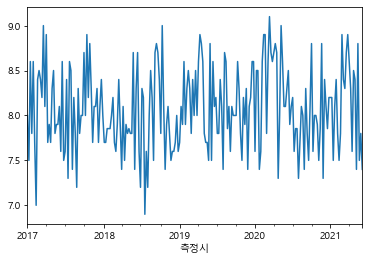

In [ ]:
font_path = "C:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

가양.ph.plot()
plt.savefig("가양_ph_plot")

In [ ]:
def adf_test(df):
  result = adfuller(df.values)
  print("ADF Statistics : %f" % result[0])
  print('p-value : %f' % result[1])

In [ ]:
adf_test(가양.ph)

ADF Statistics : -5.428888
p-value : 0.000003


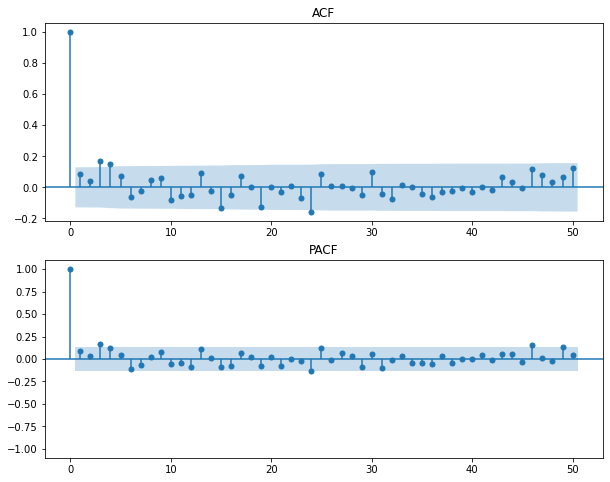

In [ ]:
# acf, pacf
plt.figure(figsize=(10,8))
sm.graphics.tsa.plot_acf(가양.ph, lags=50, ax=plt.subplot(211), title="ACF")
sm.graphics.tsa.plot_pacf(가양.ph, lags=50, ax=plt.subplot(212), title='PACF')
plt.ylim(-1.1, 1.1)
plt.savefig("가양_ph_acf")

In [ ]:
#auto_arima 함수로 최적 파라미터 자동 추출
model_arima_ph = auto_arima(가양.ph, trace=True, error_action='ignore', start_p=1, start_q=1, max_p=5, max_q=5,
                         suppress_warnings=True, stepwise=False, seasonal=False, d=1)
model_arima_ph.fit(가양.ph)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=437.216, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=380.565, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=338.295, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=322.490, Time=0.07 sec
 ARIMA(3

ARIMA(order=(4, 1, 0), scoring_args={}, suppress_warnings=True)

In [ ]:
model_ph = ARIMA(가양.ph, order=(4,1,0))
model_fit_ph = model_ph.fit(disp=0)
print(model_fit_ph.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D.ph   No. Observations:                  231
Model:                 ARIMA(4, 1, 0)   Log Likelihood                -153.318
Method:                       css-mle   S.D. of innovations              0.469
Date:                Sat, 28 Aug 2021   AIC                            318.636
Time:                        20:55:06   BIC                            339.290
Sample:                    01-08-2017   HQIC                           326.967
                         - 06-06-2021                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0013      0.010     -0.129      0.897      -0.021       0.018
ar.L1.D.ph    -0.8304      0.065    -12.755      0.000      -0.958      -0.703
ar.L2.D.ph    -0.7005      0.081     -8.610      0.0

D:\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warning

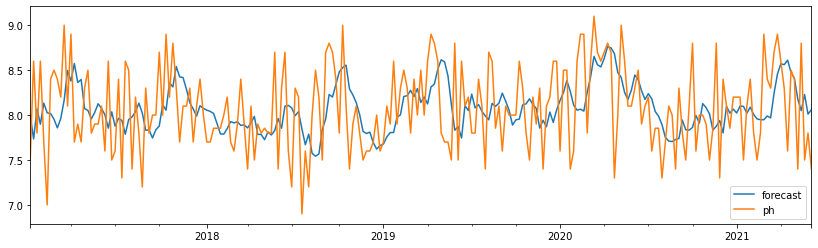

In [ ]:
# 실제 데이터와 그 데이터를 예측한 그래프
plt.rcParams["figure.figsize"] = (14,4)
model_fit_ph.plot_predict(dynamic=False)
plt.savefig("가양_ph_trainpred_plot")

In [ ]:
model_ph = ARIMA(가양.ph, order=(4,1,0))
fitted_ph = model_ph.fit(disp=0)

# 3 Weeks Forecasting
fc_ph, se_ph, conf_ph = fitted_ph.forecast(3, alpha=0.05)  # 95% conf
fc_ph # Point Estimator

D:\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warning

array([7.81179598, 7.83615263, 7.63497865])

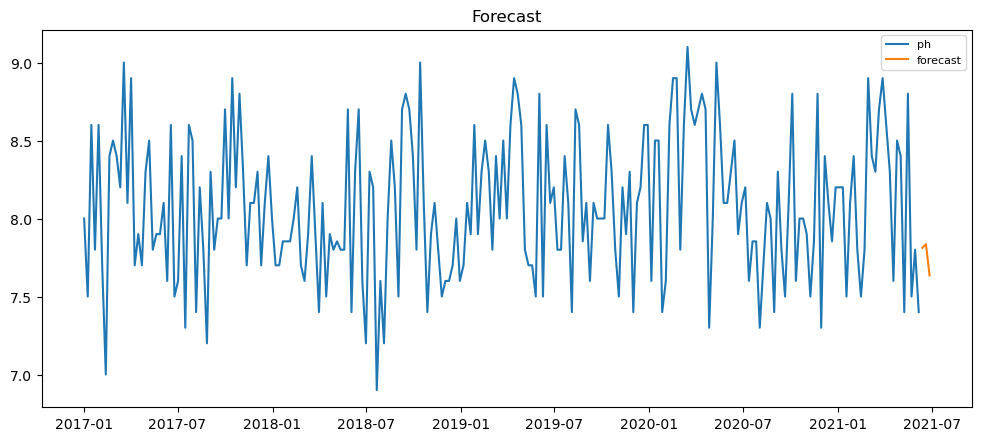

In [ ]:
# 예측값 시각화
fc_series = pd.Series(fc_ph, index=list(pd.date_range('2021-06-13', periods=3, freq='W')))

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(가양.ph, label='ph')
plt.plot(fc_series, label='forecast')
plt.title('Forecast')
plt.legend(loc='upper right', fontsize=8)
plt.savefig("가양_ph_pred_plot")

#### 가양.DO

In [ ]:
adf_test(가양.DO)

ADF Statistics : -5.049048
p-value : 0.000018


In [ ]:
#auto_arima 함수로 최적 파라미터 자동 추출
model_arima_DO = auto_arima(가양.DO, trace=True, error_action='ignore', start_p=1, start_q=1, max_p=5, max_q=5,
                         suppress_warnings=True, stepwise=False, seasonal=False, d=1)
model_arima_DO.fit(가양.DO)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=911.212, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=858.616, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=860.593, Time=0.05 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=862.574, Time=0.05 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=863.069, Time=0.10 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=865.047, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=870.727, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=860.594, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=861.228, Time=0.20 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=863.075, Time=0.14 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=864.550, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=865.012, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=862.586, Time=0.15 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=863.103, Time=0.30 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(3,1,0)(0,0,0)[0] inter

ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True)

In [ ]:
model_DO = ARIMA(가양.DO, order=(0,1,1))
fitted_DO = model_DO.fit(disp=0)

# 3 Weeks Forecasting
fc_DO, se_DO, conf_DO = fitted_DO.forecast(3, alpha=0.05)  # 95% conf
fc_DO # Point Estimator

D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


array([8.03642631, 8.01770452, 7.99898272])

#### 가양.BOD

In [ ]:
adf_test(가양.BOD)

ADF Statistics : -4.301261
p-value : 0.000442


In [ ]:
#auto_arima 함수로 최적 파라미터 자동 추출
model_arima_BOD = auto_arima(가양.BOD, trace=True, error_action='ignore', start_p=1, start_q=1, max_p=5, max_q=5,
                         suppress_warnings=True, stepwise=False, seasonal=False, d=1)
model_arima_BOD.fit(가양.BOD)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=724.549, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=659.624, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=661.193, Time=0.06 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=661.764, Time=0.09 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=663.683, Time=0.12 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=inf, Time=0.65 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=678.695, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=661.030, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=663.584, Time=0.08 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=662.770, Time=0.24 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=664.402, Time=0.18 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=671.835, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=654.872, Time=0.20 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   :

ARIMA(order=(2, 1, 3), scoring_args={}, suppress_warnings=True)

In [ ]:
model_BOD = ARIMA(가양.BOD[1:], order=(0,1,1)) # order=(2,1,3) is second best parameters
fitted_BOD = model_BOD.fit(disp=0)

# 3 Weeks Forecasting
fc_BOD, se_BOD, conf_BOD = fitted_BOD.forecast(3, alpha=0.05)  # 95% conf
fc_BOD # Point Estimator

D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


array([1.97975959, 1.98171282, 1.98366604])

#### 가양.COD

In [ ]:
adf_test(가양.COD)

ADF Statistics : -5.729966
p-value : 0.000001


In [ ]:
#auto_arima 함수로 최적 파라미터 자동 추출
model_arima_COD = auto_arima(가양.COD, trace=True, error_action='ignore', start_p=1, start_q=1, max_p=5, max_q=5,
                         suppress_warnings=True, stepwise=False, seasonal=False, d=1)
model_arima_COD.fit(가양.COD)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=675.872, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=626.292, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=626.446, Time=0.07 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=626.713, Time=0.07 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=628.565, Time=0.14 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=630.145, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=642.632, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=625.648, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=620.850, Time=0.47 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=636.234, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=620.093, Time=0.41 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True)

In [ ]:
model_COD = ARIMA(가양.COD, order=(2,1,2))
fitted_COD = model_COD.fit(disp=0)

# 3 Weeks Forecasting
fc_COD, se_COD, conf_COD = fitted_COD.forecast(3, alpha=0.05)  # 95% conf
fc_COD # Point Estimator

D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
D:\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('

array([5.36567499, 5.29935428, 5.24849766])

#### 가양.부유물질

In [ ]:
adf_test(가양.부유물질)

ADF Statistics : -5.669976
p-value : 0.000001


In [ ]:
#auto_arima 함수로 최적 파라미터 자동 추출
model_arima_부유물질 = auto_arima(가양.부유물질, trace=True, error_action='ignore', start_p=1, start_q=1, max_p=5, max_q=5,
                         suppress_warnings=True, stepwise=False, seasonal=False, d=1)
model_arima_부유물질.fit(가양.부유물질)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2176.195, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2026.209, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2028.030, Time=0.07 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=2027.113, Time=0.15 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=2027.687, Time=0.20 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=2021.879, Time=0.39 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2085.697, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2027.977, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2030.133, Time=0.18 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2021.954, Time=0.16 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=2023.030, Time=0.24 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2076.956, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2025.922, Time=0.14 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2022.633, Time=0.23 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2022.395, Time=0.27 sec
 ARIMA(3,1

ARIMA(order=(4, 1, 1), scoring_args={}, suppress_warnings=True)

In [ ]:
model_부유물질 = ARIMA(가양.부유물질, order=(4,1,1))
fitted_부유물질 = model_부유물질.fit(disp=0)

# 3 Weeks Forecasting
fc_부유물질, se_부유물질, conf_부유물질 = fitted_부유물질.forecast(3, alpha=0.05)  # 95% conf
fc_부유물질 # Point Estimator

D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
D:\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('

array([12.53012631, 12.96348288, 11.77085116])

#### 가양.TN

In [ ]:
adf_test(가양.TN)

ADF Statistics : -3.270712
p-value : 0.016240


In [ ]:
#auto_arima 함수로 최적 파라미터 자동 추출
model_arima_TN = auto_arima(가양.TN, trace=True, error_action='ignore', start_p=1, start_q=1, max_p=5, max_q=5,
                         suppress_warnings=True, stepwise=False, seasonal=False, d=1)
model_arima_TN.fit(가양.TN)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=807.461, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=742.883, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=742.386, Time=0.06 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=744.196, Time=0.10 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=741.835, Time=0.14 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=742.379, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=772.853, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=742.402, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=744.348, Time=0.24 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=745.427, Time=0.17 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=743.208, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=764.472, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=744.225, Time=0.11 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=744.443, Time=0.31 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=740.763, Time=0.22 sec
 ARIMA(3,1,0)(0,0,0)[0] i

ARIMA(order=(4, 1, 0), scoring_args={}, suppress_warnings=True)

In [ ]:
model_TN = ARIMA(가양.TN, order=(4,1,0))
fitted_TN = model_TN.fit(disp=0)

# 3 Weeks Forecasting
fc_TN, se_TN, conf_TN = fitted_TN.forecast(3, alpha=0.05)  # 95% conf
fc_TN # Point Estimator

D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


array([3.25392342, 3.09004713, 3.00828119])

#### 가양.TP

In [ ]:
adf_test(가양.TP)

ADF Statistics : -4.044094
p-value : 0.001196


In [ ]:
#auto_arima 함수로 최적 파라미터 자동 추출
model_arima_TP = auto_arima(가양.TP, trace=True, error_action='ignore', start_p=1, start_q=1, max_p=5, max_q=5,
                         suppress_warnings=True, stepwise=False, seasonal=False, d=1)
model_arima_TP.fit(가양.TP)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-727.629, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-845.508, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-845.590, Time=0.25 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-843.724, Time=0.38 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-841.920, Time=0.44 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=-849.535, Time=0.29 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-798.887, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-845.448, Time=0.24 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-844.941, Time=0.28 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-841.890, Time=0.24 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-843.485, Time=0.45 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-819.442, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-843.673, Time=0.35 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-842.849, Time=0.35 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-840.980, Time=0.43 sec
 ARIMA(3,1

ARIMA(order=(0, 1, 5), scoring_args={}, suppress_warnings=True)

In [ ]:
model_TP = ARIMA(가양.TP, order=(0,1,5))
fitted_TP = model_TP.fit(disp=0)

# 3 Weeks Forecasting
fc_TP, se_TP, conf_TP = fitted_TP.forecast(3, alpha=0.05)  # 95% conf
fc_TP # Point Estimator

D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


array([0.08300911, 0.0902471 , 0.09037911])

#### 가양.TOC

In [ ]:
adf_test(가양.TOC)

ADF Statistics : -3.839109
p-value : 0.002532


In [ ]:
#auto_arima 함수로 최적 파라미터 자동 추출
model_arima_TOC = auto_arima(가양.TOC, trace=True, error_action='ignore', start_p=1, start_q=1, max_p=5, max_q=5,
                         suppress_warnings=True, stepwise=False, seasonal=False, d=1)
model_arima_TOC.fit(가양.TOC)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=466.625, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=367.061, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=365.911, Time=0.10 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=366.944, Time=0.19 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=368.876, Time=0.24 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=370.134, Time=0.47 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=419.746, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=365.279, Time=0.21 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=365.892, Time=0.45 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=367.583, Time=0.44 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=402.184, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=366.402, Time=0.28 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=366.856, Time=0.42 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=365.970, Time=0.51 sec
 ARIMA(3,1,0)(0,0,0)[0] inter

ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True)

In [ ]:
model_TOC = ARIMA(가양.TOC, order=(1,1,1))
fitted_TOC = model_TOC.fit(disp=0)

# 3 Weeks Forecasting
fc_TOC, se_TOC, conf_TOC = fitted_TOC.forecast(3, alpha=0.05)  # 95% conf
fc_TOC # Point Estimator

D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
D:\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('

array([2.20872691, 2.22570071, 2.22590387])

#### 가양.수온

In [ ]:
adf_test(가양.수온)

ADF Statistics : -6.553694
p-value : 0.000000


In [ ]:
#auto_arima 함수로 최적 파라미터 자동 추출
model_arima_수온 = auto_arima(가양.수온, trace=True, error_action='ignore', start_p=1, start_q=1, max_p=5, max_q=5,
                         suppress_warnings=True, stepwise=False, seasonal=False, d=1)
model_arima_수온.fit(가양.수온)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1176.656, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1167.225, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1167.682, Time=0.07 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1169.596, Time=0.08 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=1170.760, Time=0.12 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=1157.672, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1166.038, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1168.005, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1162.435, Time=0.25 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1162.658, Time=0.28 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=1160.447, Time=0.19 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1167.987, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1166.091, Time=0.21 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1159.932, Time=0.46 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1164.484, Time=0.18 sec
 ARIMA(3,1

ARIMA(order=(0, 1, 5), scoring_args={}, suppress_warnings=True)

In [ ]:
model_수온 = ARIMA(가양.수온, order=(0,1,5))
fitted_수온 = model_수온.fit(disp=0)

# 3 Weeks Forecasting
fc_수온, se_수온, conf_수온 = fitted_수온.forecast(3, alpha=0.05)  # 95% conf
fc_수온 # Point Estimator

D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


array([24.41930594, 24.37872844, 24.45860695])

#### 가양.총대장균군수

In [ ]:
adf_test(가양.총대장균군수)

ADF Statistics : -14.128199
p-value : 0.000000


In [ ]:
#auto_arima 함수로 최적 파라미터 자동 추출
model_arima_총대장균군수 = auto_arima(가양.총대장균군수, trace=True, error_action='ignore', start_p=1, start_q=1, max_p=5, max_q=5,
                         suppress_warnings=True, stepwise=False, seasonal=False, d=1)
model_arima_총대장균군수.fit(가양.총대장균군수)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6804.762, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6680.698, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=6682.183, Time=0.04 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=6683.850, Time=0.06 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=6686.111, Time=0.11 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=6688.554, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6743.905, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6681.672, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=6678.430, Time=0.06 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=6680.120, Time=0.26 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=6682.525, Time=0.25 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=6714.461, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=6682.837, Time=0.07 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6679.748, Time=0.19 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.56 sec
 ARIMA(3,1,0)(0

ARIMA(order=(1, 1, 2), scoring_args={}, suppress_warnings=True)

In [ ]:
model_총대장균군수 = ARIMA(가양.총대장균군수, order=(1,1,2))
fitted_총대장균군수 = model_총대장균군수.fit(disp=0)

# 3 Weeks Forecasting
fc_총대장균군수, se_총대장균군수, conf_총대장균군수 = fitted_총대장균군수.forecast(3, alpha=0.05)  # 95% conf
fc_총대장균군수 # Point Estimator

D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA

array([1289848.61978463, 1292808.93278854, 1295781.66786913])

#### 가양.암모니아성 질소

In [ ]:
adf_test(가양.iloc[:,10])

ADF Statistics : -3.257887
p-value : 0.016869


In [ ]:
#auto_arima 함수로 최적 파라미터 자동 추출
model_arima_암모니아성질소 = auto_arima(가양.iloc[:,10], trace=True, error_action='ignore', start_p=1, start_q=1, max_p=5, max_q=5,
                         suppress_warnings=True, stepwise=False, seasonal=False, d=1)
model_arima_암모니아성질소.fit(가양.iloc[:,10])

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=653.044, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=546.429, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=548.396, Time=0.09 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=548.536, Time=0.13 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=547.082, Time=0.11 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=548.699, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=598.845, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=548.403, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=549.429, Time=0.25 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=549.515, Time=0.26 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=548.985, Time=0.21 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=579.332, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=549.203, Time=0.17 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=548.186, Time=0.20 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=546.998, Time=0.41 sec
 ARIMA(3,1,0)(0,0,0)[0] i

ARIMA(order=(4, 1, 0), scoring_args={}, suppress_warnings=True)

In [ ]:
model_암모니아성질소 = ARIMA(가양.iloc[:,10], order=(4,1,0))
fitted_암모니아성질소 = model_암모니아성질소.fit(disp=0)

# 3 Weeks Forecasting
fc_암모니아성질소, se_암모니아성질소, conf_암모니아성질소 = fitted_암모니아성질소.forecast(3, alpha=0.05)  # 95% conf
fc_암모니아성질소 # Point Estimator

D:\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warning

array([0.27503691, 0.21616962, 0.20486624])

#### 가양.클로로필a

In [ ]:
adf_test(가양.iloc[:,11])

ADF Statistics : -6.170957
p-value : 0.000000


In [ ]:
#auto_arima 함수로 최적 파라미터 자동 추출
model_arima_클로로필a = auto_arima(가양.iloc[:,11], trace=True, error_action='ignore', start_p=1, start_q=1, max_p=5, max_q=5,
                         suppress_warnings=True, stepwise=False, seasonal=False, d=1)
model_arima_클로로필a.fit(가양.iloc[:,11])

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2045.353, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2013.512, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2036.526, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2007.319, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2003.121, Time=0.08 sec

ARIMA(order=(4, 1, 0), scoring_args={}, suppress_warnings=True)

In [ ]:
model_클로로필a = ARIMA(가양.iloc[:,11], order=(4,1,0))
fitted_클로로필a = model_클로로필a.fit(disp=0)

# 3 Weeks Forecasting
fc_클로로필a, se_클로로필a, conf_클로로필a = fitted_클로로필a.forecast(3, alpha=0.05)  # 95% conf
fc_클로로필a # Point Estimator

D:\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warning

array([12.34682107, 23.45043252, 22.89983797])

#### 가양.분원성대장균군수

In [ ]:
adf_test(가양.분원성대장균군수)

ADF Statistics : -15.156784
p-value : 0.000000


In [ ]:
#auto_arima 함수로 최적 파라미터 자동 추출
model_arima_분원성대장균군수 = auto_arima(가양.분원성대장균군수, trace=True, error_action='ignore', start_p=1, start_q=1, max_p=5, max_q=5,
                         suppress_warnings=True, stepwise=False, seasonal=False, d=1)
model_arima_분원성대장균군수.fit(가양.분원성대장균군수)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5013.020, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4949.940, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=4926.075, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=4908.917, Time=0.05 sec
 ARI

ARIMA(order=(3, 1, 1), scoring_args={}, suppress_warnings=True)

In [ ]:
model_분원성대장균군수 = ARIMA(가양.분원성대장균군수, order=(3,1,1))
fitted_분원성대장균군수 = model_분원성대장균군수.fit(disp=0)

# 3 Weeks Forecasting
fc_분원성대장균군수, se_분원성대장균군수, conf_분원성대장균군수 = fitted_분원성대장균군수.forecast(3, alpha=0.05)  # 95% conf
fc_분원성대장균군수 # Point Estimator

D:\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warning

array([3136.98658495, 3066.67734855, 2887.30255487])

#### 가양.유량

In [ ]:
adf_test(가양.유량)

ADF Statistics : -4.218190
p-value : 0.000614


In [ ]:
#auto_arima 함수로 최적 파라미터 자동 추출
model_arima_유량 = auto_arima(가양.유량, trace=True, error_action='ignore', start_p=1, start_q=1, max_p=5, max_q=5,
                         suppress_warnings=True, stepwise=False, seasonal=False, d=1)
model_arima_유량.fit(가양.유량)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1415.443, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1343.429, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1343.383, Time=0.06 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1344.901, Time=0.07 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=1346.901, Time=0.10 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=1348.881, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1379.807, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1343.674, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1344.998, Time=0.19 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1346.901, Time=0.17 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=1348.384, Time=0.26 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1358.528, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1344.916, Time=0.09 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1346.893, Time=0.17 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1348.894, Time=0.21 sec
 ARIMA(3,1

ARIMA(order=(0, 1, 2), scoring_args={}, suppress_warnings=True)

In [ ]:
model_유량 = ARIMA(가양.유량, order=(0,1,2))
fitted_유량 = model_유량.fit(disp=0)

# 3 Weeks Forecasting
fc_유량, se_유량, conf_유량 = fitted_유량.forecast(3, alpha=0.05)  # 95% conf
fc_유량 # Point Estimator

D:\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warning

array([12.65741827, 12.23666063, 12.27587552])

### TARGET(하천생활등급)예측

In [ ]:
cols = ['ph', 'DO', 'BOD', 'COD', '부유물질', 'TN', 'TP', 'TOC', '수온', '총대장균군수', '암모니아성 질소', '클로로필 a','분원성대장균군수', '유량']
dr = pd.date_range('2021-06-13', periods=3, freq='W')
가양_pred = pd.DataFrame(np.column_stack([fc_ph, fc_DO, fc_BOD, fc_COD, fc_부유물질, fc_TN, fc_TP, fc_TOC, fc_수온, fc_총대장균군수, fc_암모니아성질소, fc_클로로필a, fc_분원성대장균군수, fc_유량]), columns=cols)
가양_pred = 가양_pred.set_index(dr) 
가양_pred

,ph,DO,BOD,COD,부유물질,TN,TP,TOC,수온,총대장균군수,암모니아성 질소,클로로필 a,분원성대장균군수,유량
2021-06-13,7.811796,8.036426,1.979760,5.365675,12.530126,3.253923,0.083009,2.208727,24.419306,1.289849e+06,0.275037,12.346821,3136.986585,12.657418
2021-06-20,7.836153,8.017705,1.981713,5.299354,12.963483,3.090047,0.090247,2.225701,24.378728,1.292809e+06,0.216170,23.450433,3066.677349,12.236661
2021-06-27,7.634979,7.998983,1.983666,5.248498,11.770851,3.008281,0.090379,2.225904,24.458607,1.295782e+06,0.204866,22.899838,2887.302555,12.275876


In [ ]:
# 판별 함수 준비
# 1이 좋음 5가 안좋음

def ph(row):
    if 8.5 >= row['ph'] >= 6.5: result = 1
    else : result = 5
    return result

def BOD(row):
    if   row['BOD'] > 10: result = 5
    elif row['BOD'] > 5: result = 4
    elif row['BOD'] > 3: result = 3
    elif row['BOD'] > 1: result = 2
    else : result = 1
    return result

def COD(row):
    if   row['COD'] > 11: result = 5
    elif row['COD'] > 7: result = 4
    elif row['COD'] > 5: result = 3
    elif row['COD'] > 2: result = 2
    else : result = 1
    return result

def DO(row):
    if   row['DO'] < 2: result = 5
    elif row['DO'] < 5: result = 3
    elif row['DO'] < 7.5: result = 2
    else : result = 1
    return result

def TN(row):
     if   row['TN'] > 8: result = 5
     elif row['TN'] > 4: result = 4
     elif row['TN'] > 3: result = 3
     elif row['TN'] > 1.5: result = 2
     else : result = 1
     return result

def TP(row):
    if   row['TP'] > 0.5: result = 5
    elif row['TP'] > 0.2: result = 4
    elif row['TP'] > 0.1: result = 3
    elif row['TP'] > 0.02: result = 2
    else : result = 1
    return result

def TOC(row):
    if   row['TOC'] > 8: result = 5
    elif row['TOC'] > 5: result = 4
    elif row['TOC'] > 4: result = 3
    elif row['TOC'] > 2: result = 2
    else : result = 1
    return result

def 부유물질(row):
    if   row['부유물질'] > 100: result = 5
    elif row['부유물질'] > 25: result = 4
    else : result = 1
    return result

def 분원성대장균군수(row):
    if   row['분원성대장균군수'] > 1000: result = 4
    elif row['분원성대장균군수'] > 200: result = 3  # elif row['분원성대장균군수'] > 10: result = 2
    else : result = 1
    return result

def 암모니아성질소(row):
    if   row['암모니아성 질소'] > 0.5: result = 3 # elif row['암모니아성 질소'] > 0.02: result = 2
    else : result = 1
    return result

def 클로로필a(row):
    if   row['클로로필 a'] >= 100 : result = 4
    elif row['클로로필 a'] >= 25 : result = 3
    elif row['클로로필 a'] >= 15 : result = 2
    else : result = 1
    return result

### 3주치 하천생활등급 예측

In [ ]:
X = 가양_pred.copy()
X['target'] = np.empty(len(X))
for i in tqdm(range(len(X))):
    row = X.iloc[i]
    target = np.max([ ph(row), BOD(row), COD(row), DO(row), TN(row),
                     TP(row), TOC(row),
                     부유물질(row), 분원성대장균군수(row),# 총대장균군수(row),
                     암모니아성질소(row), 클로로필a(row)
                      ])
    X['target'][i] = target
    
X['target']

2021-06-13    4.0
2021-06-20    4.0
2021-06-27    4.0
Freq: W-SUN, Name: target, dtype: float64